In [1]:
import brainsurf.data.csv as csv_import
file_path = 'brainsurf/data/samples/adarsh/adarsh_pre_med.csv'
adarsh_pre_med = csv_import.convert_csv_to_eegdata(file_path)
data_summary = adarsh_pre_med.summary(300)

       sec        raw
0    0.000 -16.534400
1    0.005 -23.730500
2    0.010 -24.639900
3    0.015 -22.241200
4    0.020 -19.952400
..     ...        ...
295  1.475  -0.976563
296  1.480  -4.052730
297  1.485  -3.845210
298  1.490  -1.745610
299  1.495   3.674320

[300 rows x 2 columns]


In [2]:
adarsh_pre_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_pre_cog.csv')
adarsh_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_med.csv')
adarsh_post_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')
adarsh_post_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')

In [3]:
adarsh_pre_med.extract_frequency_bands()
adarsh_pre_cog.extract_frequency_bands()
adarsh_med.extract_frequency_bands()
adarsh_post_med.extract_frequency_bands()
adarsh_post_cog.extract_frequency_bands()

In [4]:
summary = adarsh_pre_med.summary(10)

     sec      raw     alpha      beta       delta     theta     gamma
0  0.000 -16.5344  0.739153  0.340532   49.747628  4.116308  0.040695
1  0.005 -23.7305  1.676459  0.749908   42.575573  3.634073  0.038842
2  0.010 -24.6399  3.382342  2.419534  135.210048  3.892357  0.125695
3  0.015 -22.2412  1.434365  1.619343   84.618161  3.953389  0.087822
4  0.020 -19.9524  4.340995  6.558143   78.591010  5.409474  0.729613
5  0.025 -18.4143  0.908967  0.688162   34.664515  1.957621  0.036741
6  0.030 -20.9778  1.791933  1.296061   83.958023  3.180223  0.098377
7  0.035 -20.2393  1.976249  1.150905   34.516828  2.102519  0.058791
8  0.040 -21.4050  0.469199  0.218817   29.096778  1.206942  0.010982
9  0.045 -21.0022  0.614998  0.385991   70.191149  3.794692  0.018610


# Sampling Frequency

In [5]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(adarsh_pre_cog['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

200.00000000000003


In [6]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4 # Sharpness

# Filtering

In [7]:

import brainsurf.preprocessing.filtering as filter

bandpass_filtered_pre_med_eeg = filter.butter_bandpass_filter(adarsh_pre_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_pre_cog_eeg = filter.butter_bandpass_filter(adarsh_pre_cog['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_med_eeg = filter.butter_bandpass_filter(adarsh_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_post_med_eeg = filter.butter_bandpass_filter(adarsh_post_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_post_cog_eeg = filter.butter_bandpass_filter(adarsh_post_med['raw'], lowcut, highcut, sampling_freq, order) 


# Comparitive Analysis

In [8]:
adarsh_pre_cog.dropna()
adarsh_post_cog.dropna()

In [9]:
min_len = min(len(adarsh_pre_cog), len(adarsh_post_cog))
pre_merged_df = adarsh_pre_cog[:min_len]
post_merged_df = adarsh_post_cog[:min_len]
print(min_len)
len(pre_merged_df)

21


21

In [10]:
# change the location of function
import brainsurf.cognitive_analysis_module.cognitive_comparision as cognitiveComp
statistic = cognitiveComp.compare_eeg_data_stats(pre_merged_df,post_merged_df)
statistic

,Feature,T-Stat,P-Value (T-Test),F-Stat,P-Value (ANOVA),Effect Size
0,EEG,8.139738,5.115667e-10,66.255341,5.115667e-10,2.634322
1,Alpha,-0.507390,6.146674e-01,0.257445,6.146674e-01,0.136628
2,Beta,-8.657478,1.038907e-10,74.951921,1.038907e-10,4.046542
3,Theta,1.770214,8.431342e-02,3.133656,8.431342e-02,0.789284
4,Delta,-0.141509,8.881781e-01,0.020025,8.881781e-01,0.115006


In [11]:
pre_sec = adarsh_pre_cog['sec']
pre_raw = adarsh_pre_cog['raw']
pre_alpha = adarsh_pre_cog['alpha']
pre_beta = adarsh_pre_cog['beta']
pre_delta = adarsh_pre_cog['delta']
pre_theta = adarsh_pre_cog['theta']
pre_gamma = adarsh_pre_cog['gamma']

during_sec = adarsh_med['sec']
during_raw = adarsh_med['raw']
during_alpha = adarsh_med['alpha']
during_beta = adarsh_med['beta']
during_delta = adarsh_med['delta']
during_theta = adarsh_med['theta']
during_gamma = adarsh_med['gamma']

post_sec = adarsh_post_cog['sec']
post_raw = adarsh_post_cog['raw']
post_alpha = adarsh_post_cog['alpha']
post_beta = adarsh_post_cog['beta']
post_delta = adarsh_post_cog['delta']
post_theta = adarsh_post_cog['theta']
post_gamma = adarsh_post_cog['gamma']


In [12]:
import numpy as np
fs = 200 
scales = np.arange(1, 10) 

In [13]:
import brainsurf.data.comparative_visualize as compare

factory = compare.ComparativeVisualizationFactory()

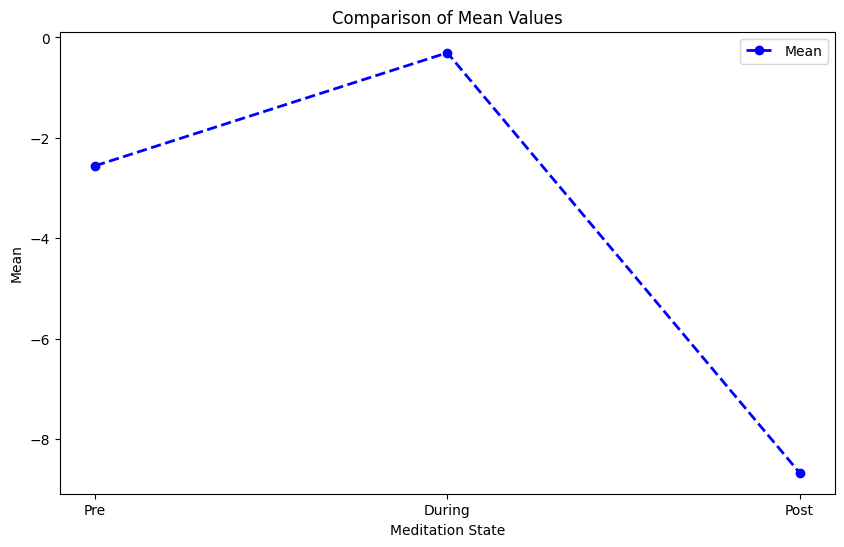

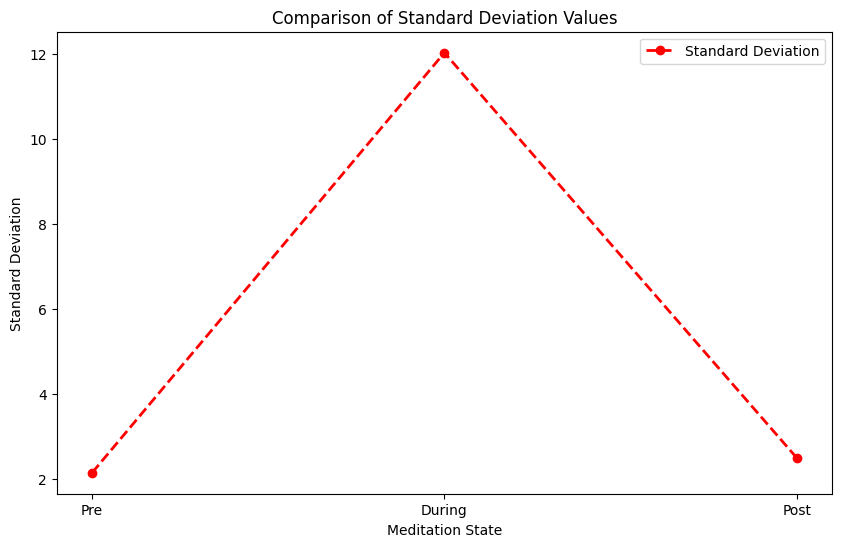

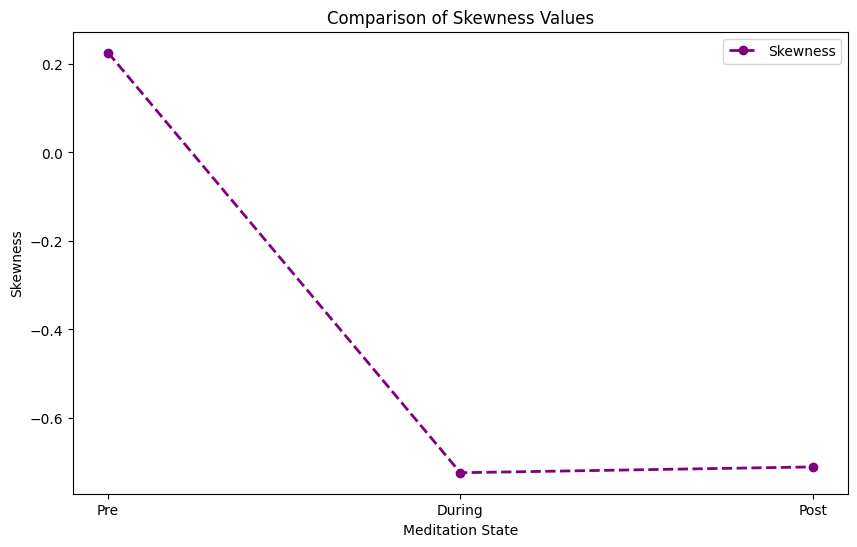

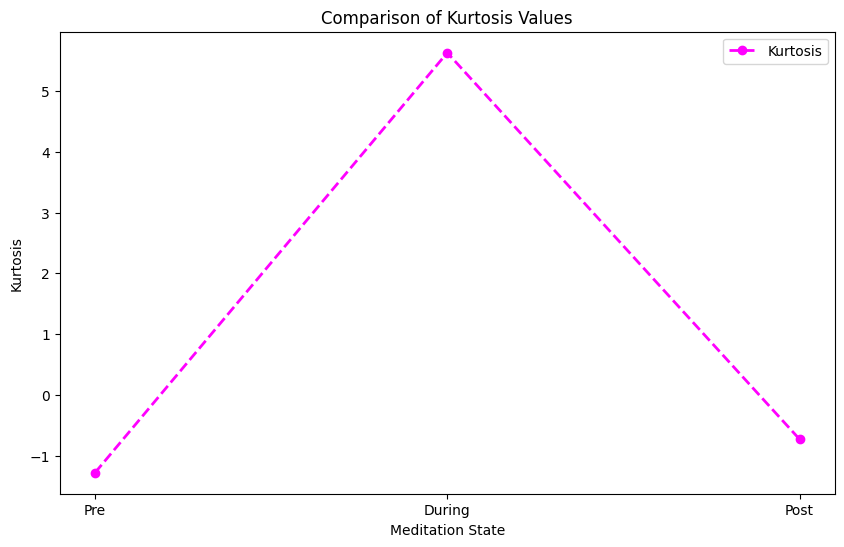

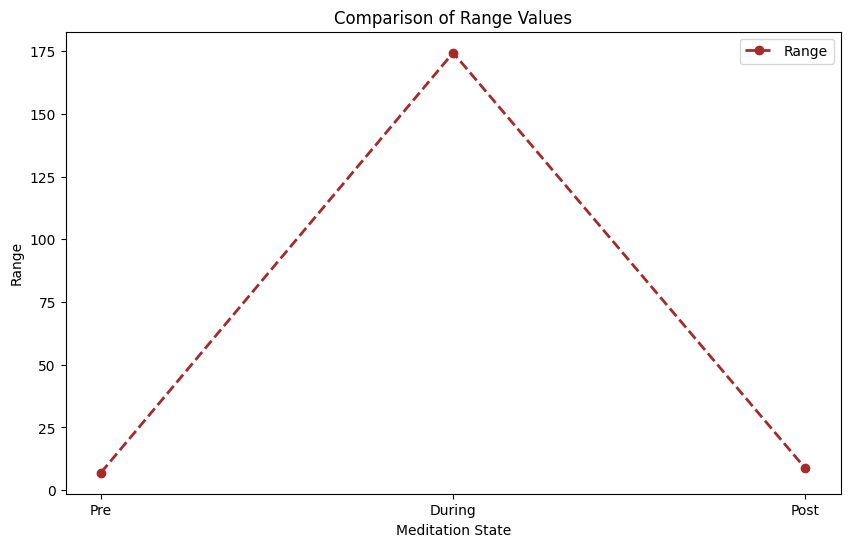

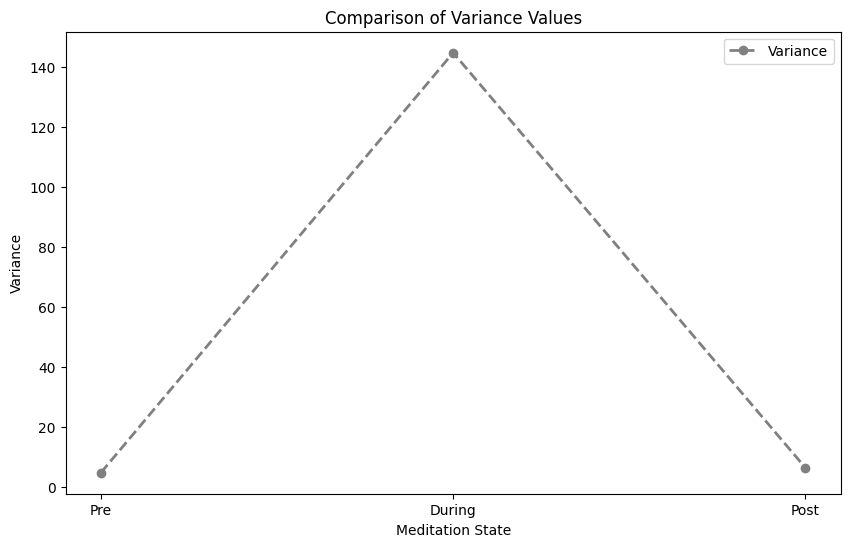

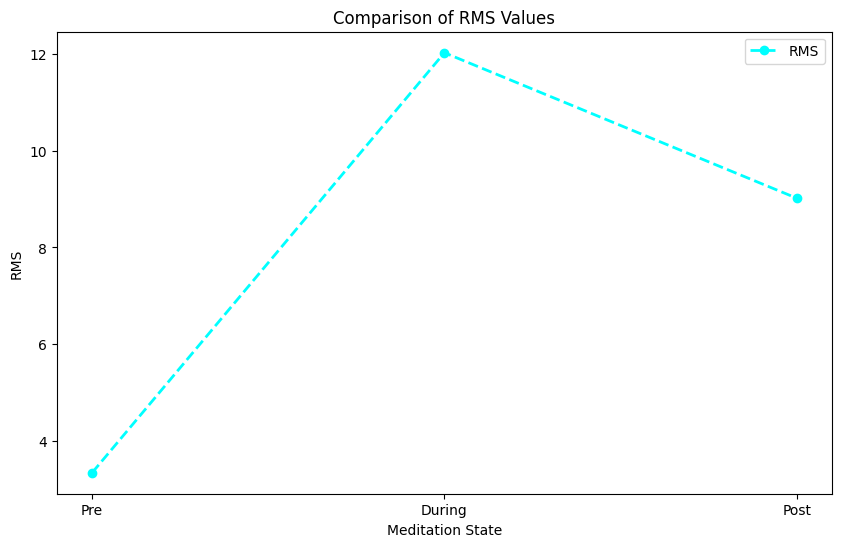

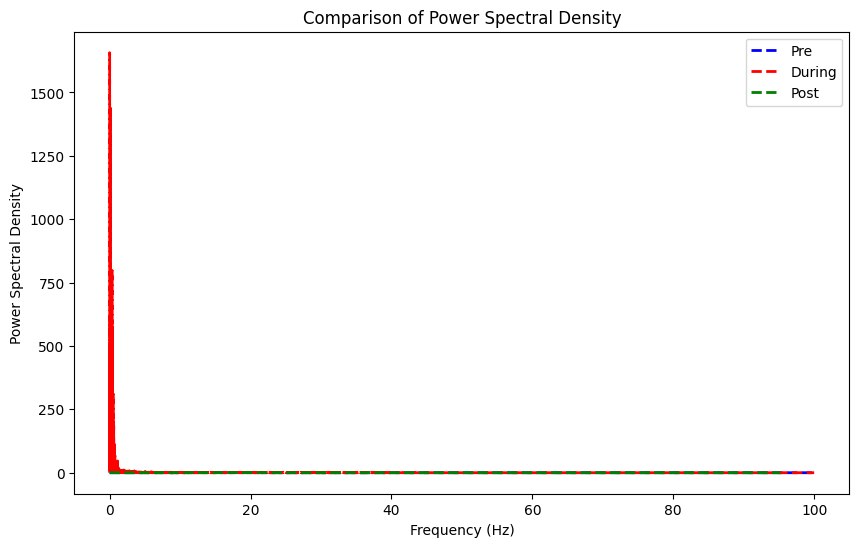

In [14]:
# Visualize statistical features
factory.visualize_mean(pre_raw, during_raw, post_raw)
factory.visualize_standard_deviation(pre_raw, during_raw, post_raw)

# Calculate and visualize other features
factory.visualize_skewness(pre_raw, during_raw, post_raw)
factory.visualize_kurtosis(pre_raw, during_raw, post_raw)
factory.visualize_range(pre_raw, during_raw, post_raw)
factory.visualize_variance(pre_raw, during_raw, post_raw)
factory.visualize_rms(pre_raw, during_raw, post_raw)
factory.visualize_spectral_power(pre_raw, during_raw, post_raw, fs)

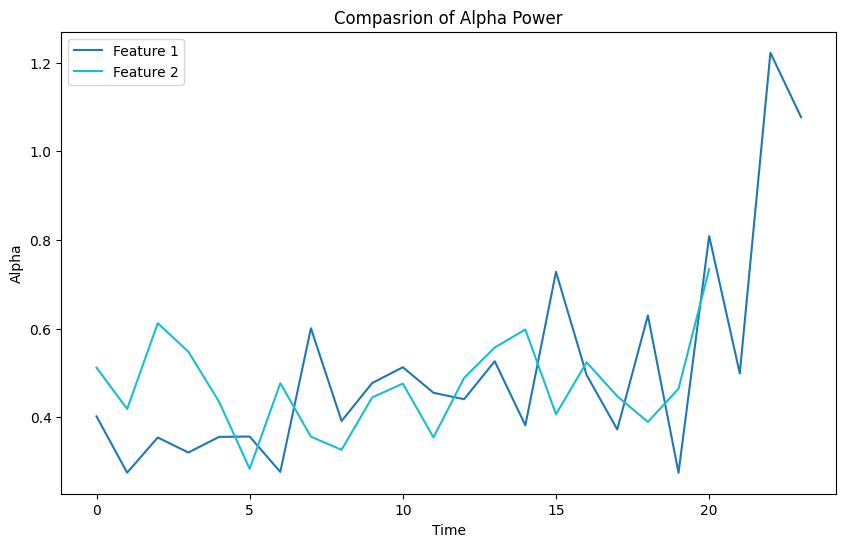

In [15]:
# factory.visualize_multi_feature_time_series(2, pre_raw, post_raw,'Time', 'Raw EEG', 'Compasrion of raw eeg signal' ) 
factory.visualize_multi_feature_time_series(2,'Time', 'Alpha', 'Compasrion of Alpha Power',pre_alpha, post_alpha ) 



# Cognitive Analysis

In [16]:
adarsh_pre_cog.dropna()
adarsh_post_cog.dropna()
adarsh_pre_cog.summary(5)

      sec       raw     alpha      beta      delta     theta     gamma
0  74.000 -5.224610  0.402189  0.190739  18.862726  1.974057  0.007472
1  74.005 -4.351810  0.275272  0.158867   5.444490  1.028094  0.005800
2  74.010 -2.026370  0.354565  0.159501   6.025449  1.288724  0.005955
3  74.015  0.030518  0.320697  0.134610   5.178307  1.446696  0.007705
4  74.020 -1.025390  0.355913  0.190410   6.233101  1.520567  0.008599


In [17]:
import brainsurf.cognitive_analysis_module.cognitive_comparision as cognitiveComp

cog_idx_before, cog_idx_after= cognitiveComp.calculate_cognitive_indexes(pre_merged_df, post_merged_df)
test_statistic, p_value = cognitiveComp.compare_cognitive_indexes(cog_idx_before, cog_idx_after)

In [18]:
# Print the test statistic and p-value
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

Test Statistic: [-0.99518372  0.9226197   0.91791643  0.89852547  0.84429538  0.85189756
  0.89173221  0.40230339  0.73463684  0.56884675  0.85744207  0.62601931
  0.64137646  0.88845388  0.8493513   0.63550799  0.9032983   0.8801228
  0.88867023  0.85168052  0.66323724]
P-value: [0.39299854 0.42425165 0.42635432 0.43512354 0.46051089 0.45687496
 0.43823394 0.71440993 0.51577508 0.60925948 0.45423905 0.57569573
 0.56691478 0.4397421  0.45808997 0.5702584  0.43295012 0.44359563
 0.43964243 0.45697842 0.55458923]


In [19]:
import pandas as pd
# Create a dictionary with column names and data
data = {
    'Performance Eval Before': cog_idx_before[0],
    'Arousal Index Before': cog_idx_before[1],
    'Neural Activity Before': cog_idx_before[2],
    'Engagement Before': cog_idx_before[3],
    'Performance Eval After': cog_idx_after[0],
    'Arousal Index After': cog_idx_after[1],
    'Neural Activity After': cog_idx_after[2],
    'Engagement After': cog_idx_after[3]
}

df = pd.DataFrame(data)
df

,Performance Eval Before,Arousal Index Before,Neural Activity Before,Engagement Before,Performance Eval After,Arousal Index After,Neural Activity After,Engagement After
0,0.474251,0.203737,35.142222,0.125976,0.358704,0.100207,108.459127,0.079917
1,0.577129,0.267749,14.909014,0.239392,0.762579,0.502025,6.672930,0.306248
2,0.449850,0.275128,14.228092,0.272725,0.547396,0.567826,8.366641,0.246849
3,0.419741,0.221676,14.550626,0.341307,0.802361,0.406141,7.702556,0.303154
4,0.534990,0.234066,14.192467,0.301051,1.181544,0.294206,8.212776,0.303011
5,0.531360,0.275972,16.776897,0.209515,1.499085,0.529121,5.889541,0.225273
6,0.707589,0.233806,15.108271,0.245197,1.122764,0.591972,5.511180,0.268667
7,0.289341,0.314632,9.601689,0.454089,1.334094,0.348601,7.761349,0.253728
8,0.549115,0.419094,9.394484,0.278301,1.333230,0.318947,5.133937,0.467619
9,0.478109,0.339415,9.615644,0.350257,1.345325,0.334956,7.238932,0.284835


From the analysis of the EEG data, we can infer the following:

1. EEG: There is a significant difference between the pre-merged and post-merged groups, as indicated by the high t-statistic (8.139738) and low p-value (5.115667e-10). The effect size (2.634322) suggests a large difference between the groups.

2. Alpha: The t-statistic (-0.507390) and p-value (0.6146674) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.136628) suggests a small difference between the groups.

3. Beta: There is a significant difference between the pre-merged and post-merged groups, as indicated by the high t-statistic (-8.657478) and low p-value (1.038907e-10). The effect size (4.046542) suggests a large difference between the groups.

4. Theta: The t-statistic (1.770214) and p-value (0.08431342) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.789284) suggests a moderate difference between the groups.

5. Delta: The t-statistic (-0.141509) and p-value (0.8881781) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.115006) suggests a small difference between the groups.

Based on these results, we can conclude that the changes in the EEG and Beta waves are statistically significant, indicating a significant difference between the pre-merged and post-merged groups. However, there are no significant differences in the Alpha, Theta, and Delta waves between the two groups.

In [20]:
# change the location of function
import brainsurf.cognitive_analysis_module.cognitive_comparision as stats

stats = stats.compare_eeg_data_stats(pre_merged_df, post_merged_df)
stats

,Feature,T-Stat,P-Value (T-Test),F-Stat,P-Value (ANOVA),Effect Size
0,EEG,8.139738,5.115667e-10,66.255341,5.115667e-10,2.634322
1,Alpha,-0.507390,6.146674e-01,0.257445,6.146674e-01,0.136628
2,Beta,-8.657478,1.038907e-10,74.951921,1.038907e-10,4.046542
3,Theta,1.770214,8.431342e-02,3.133656,8.431342e-02,0.789284
4,Delta,-0.141509,8.881781e-01,0.020025,8.881781e-01,0.115006


In [21]:
from scipy import stats

# Perform t-test for 'Arousal Index Before'
arousal_index_before = df['Arousal Index Before']
tstat_arousal_index, pvalue_arousal_index = stats.ttest_rel(arousal_index_before, df['Arousal Index After'])


# Perform t-test for 'Neural Activity Before'
neural_activity_before = df['Neural Activity Before']
tstat_neural_activity, pvalue_neural_activity = stats.ttest_rel(neural_activity_before, df['Neural Activity After'])

# Perform t-test for 'Performance Index'
performance_index = df['Performance Eval Before']
tstat_performance_index, pvalue_performance_index = stats.ttest_rel(performance_index, df['Performance Eval After'])

# Perform t-test for 'Engagement Before'
engagement_before = df['Engagement Before']
tstat_engagement, pvalue_engagement = stats.ttest_rel(engagement_before, df['Engagement After'])

print('P-value for Neural Activity Before:', pvalue_neural_activity)
print('P-value for Performance Index:', pvalue_performance_index)
print('P-value for Engagement Before:', pvalue_engagement)
print('P-value for Arousal Index Before:', pvalue_arousal_index)

P-value for Neural Activity Before: 0.44501587672222387
P-value for Performance Index: 5.011632334269875e-07
P-value for Engagement Before: 0.6517442781493693
P-value for Arousal Index Before: 0.0002820176696370403


Based on the calculated p-values for the variables during a Stroop test before and after meditation, here are the inferences:

1. Neural Activity Before: The p-value (0.445) is greater than the significance level, indicating no significant difference in neural activity during the Stroop test before and after meditation. This suggests that meditation may not have had a noticeable effect on neural activity during the Stroop test.

2. Performance Index: The p-value (5.01e-07) is less than the significance level, indicating a statistically significant difference in the performance index during the Stroop test before and after meditation. This suggests that meditation may have influenced the performance index during the Stroop test.

3. Engagement Before: The p-value (0.651) is greater than the significance level, indicating no significant difference in engagement during the Stroop test before and after meditation. This suggests that meditation may not have significantly affected the level of engagement during the Stroop test.

4. Arousal Index Before: The p-value (0.00028) is less than the significance level, indicating a statistically significant difference in the arousal index during the Stroop test before and after meditation. This suggests that meditation may have influenced the level of arousal during the Stroop test.

These inferences indicate that during the Stroop test, meditation may have had a significant impact on the performance index and the level of arousal. However, it may not have significantly affected neural activity and the level of engagement. It's important to consider these findings in the context of the Stroop test and further explore the specific cognitive effects of meditation.

# Stroop Test Analysis

In [22]:
import pandas as pd
file_path = 'brainsurf/data/samples/stroop.csv'
stroop_adarsh_pre = pd.read_csv(file_path)
stroop_adarsh_pre

,color1,color2,Congruent,Response Time,Accuracy,Trial,Block,ID
0,red,yellow,0,5,4,1,1894,1
1,yellow,green,0,2,2,1,1431,1
2,red,red,1,8,1,3,2000,1
3,blue,blue,1,15,3,1,1838,1
4,yellow,blue,0,3,4,2,1263,1
5,green,red,0,12,1,1,1430,1
6,green,red,0,12,1,1,1347,1
7,red,green,0,6,2,1,1093,1
8,yellow,yellow,1,1,4,1,1874,1
9,blue,green,0,14,1,3,2000,1


In [23]:
pre_stroop = cognitiveComp.analyze_stroop_data(stroop_adarsh_pre)
print(pre_stroop)

{'Average Response Time - Congruent': 9.181818181818182, 'Average Response Time - Incongruent': 8.586206896551724, 'T-Test - Response Time - t-value': 0.3493922376785635, 'T-Test - Response Time - p-value': 1.9354754357353197, 'Average Accuracy - Congruent': 2.3636363636363638, 'Average Accuracy - Incongruent': 2.310344827586207, 'T-Test - Accuracy - t-value': 0.13022288111030894, 'T-Test - Accuracy - p-value': 1.9726379277160297}


Response Time Analysis:

The average response time for congruent trials (where Color 1 and Color 2 are congruent) is 9.18 units.
The average response time for incongruent trials (where Color 1 and Color 2 are incongruent) is 8.59 units.
The t-value is 0.35, indicating a small difference between the average response times of congruent and incongruent trials.
The p-value is 1.9355, which is not statistically significant. This suggests that the difference in response times between congruent and incongruent trials may have occurred by chance.
Accuracy Analysis:

The average accuracy for congruent trials is 236.36%.
The average accuracy for incongruent trials is 231.03%.
The t-value is 0.13, indicating a small difference between the average accuracies of congruent and incongruent trials.
The p-value is 1.9726, which is not statistically significant. This implies that the difference in accuracies between congruent and incongruent trials may have occurred by chance.

In [24]:
file_path = 'brainsurf/data/samples/adarsh_stroop_post.csv'
stroop_adarsh_post = pd.read_csv(file_path)
stroop_adarsh_post

,Color1,Color2,Congruent,Response Time,Accuracy,Block,Trial
0,yellow,blue,0,3,3,1,981
1,green,blue,0,11,3,1,898
2,red,green,0,6,2,1,1114
3,yellow,red,0,4,1,1,1216
4,yellow,red,0,4,1,1,1087
5,blue,yellow,0,13,4,1,1041
6,blue,red,0,16,1,1,871
7,green,green,1,10,2,1,854
8,yellow,green,0,2,2,1,885
9,yellow,blue,0,3,3,1,1077


In [25]:
post_stroop =cognitiveComp.analyze_stroop_data(stroop_adarsh_post)
print(post_stroop)

{'Average Response Time - Congruent': 8.363636363636363, 'Average Response Time - Incongruent': 8.448275862068966, 'T-Test - Response Time - t-value': -0.04906760804322319, 'T-Test - Response Time - p-value': 1.9890223274652588, 'Average Accuracy - Congruent': 2.5454545454545454, 'Average Accuracy - Incongruent': 2.5172413793103448, 'T-Test - Accuracy - t-value': 0.06685566070296331, 'T-Test - Accuracy - p-value': 1.9853693568978035}


Based on the provided information, it seems that the response times and accuracy did not show significant differences before and after meditation, as indicated by the p-values being greater than the typical significance level of 0.05.



# Machine Learning Models

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from brainsurf.machine_learning.eeg_binary_classification import EEGClassifier

# Step 1: Load and preprocess the data
data = pd.read_csv('brainsurf/data/samples/adarsh/ml_class.csv')  # Assuming the data is stored in a CSV file
X = data[['EEG']].values  # Extract features (sec, raw)
y = data['State'].values  # Extract labels

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the classifier
classifier = EEGClassifier()
classifier.train(X_train, y_train)

# Step 4: Evaluate the classifier
accuracy = classifier.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6266541576140628


In [27]:
# Step 5: Predict on new, unseen data
data = pd.read_csv('brainsurf/data/samples/adarsh/ani_ml.csv')  # Assuming the data is stored in a CSV file
X = data[['EEG']].values  # Extract features (sec, raw)
y = data['State'].values  # Extract labels


In [28]:
# Replace the ellipsis with your new EEG data (sec, raw)
new_predictions = classifier.predict(X)
print(f"New data predictions: {new_predictions}")

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
new_labels = y  # Replace the ellipsis with the actual ground truth labels for the new EEG data
accuracy = accuracy_score(new_labels, new_predictions)
print(f"Accuracy on new data: {accuracy}")

Accuracy on new data: 0.6360799254245532


In [ ]:
# The machine learning model used in this code is a Random Forest Regressor. It is trained to predict levels of alpha, beta, theta, and delta based on the input features.
#  The model is instantiated using RandomForestRegressor from the sklearn.ensemble module. It uses an ensemble of decision trees and makes predictions by averaging the predictions of individual trees in the forest. 

 # data = load_data('C:/Users/Preethi V Hiremath/OneDrive/Desktop/Projects/brainsurf_Capstone/brainsurfPython/brainsurf/data/samples/mantra_meditation/sample_data2.csv')
    # preprocessed_data = preprocess_data(data)
    # X_train, X_test, y_train, y_test = split_data(preprocessed_data)
    # model = train_model(X_train, y_train)
    # evaluate_model(model, X_test, y_test)
    # visualize_predictions(model, X_test, y_test)